In [1]:
import pandas as pd
import numpy as np

Read the data into six separate dataframes.

In [2]:
df1 = pd.read_csv("turnstile_200606.csv")
df2 = pd.read_csv("turnstile_200530.csv")
df3 = pd.read_csv("turnstile_200411.csv")
df4 = pd.read_csv("turnstile_200321.csv")
df5 = pd.read_csv("turnstile_200208.csv")
df6 = pd.read_csv("turnstile_200118.csv")

Concatenate the data into one dataframe.

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [5]:
print('DATE datatype: {}, TIME datatype: "{}"'.format(df['DATE'].dtypes, df['TIME'].dtypes))

DATE datatype: object, TIME datatype: "object"


In [6]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

After conversion, the datatype for the DATETIME column is a datetime.

In [7]:
df['DATETIME'].dtypes

dtype('<M8[ns]')

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


The total entries for each turnstile are observed using the `groupby` function in Pandas.

In [9]:
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).sum()

ENTRIES  \
C/A   UNIT SCP      STATION                     
A002  R051 02-00-00 59 ST          1856312674   
           02-00-01 59 ST          1656360047   
           02-03-00 59 ST           344531036   
           02-03-01 59 ST           360029390   
           02-03-02 59 ST          1643674329   
...                                       ...   
TRAM2 R469 00-00-01 RIT-ROOSEVELT   868760892   
           00-03-00 RIT-ROOSEVELT   188318641   
           00-03-01 RIT-ROOSEVELT   788266243   
           00-05-00 RIT-ROOSEVELT      774684   
           00-05-01 RIT-ROOSEVELT     1399608   

                                   EXITS                                                                 
C/A   UNIT SCP      STATION                                                                              
A002  R051 02-00-00 59 ST                                                  630021138                     
           02-00-01 59 ST                                                  372796746                     
           02-03-00 59 ST                                                 1297828534                     
           02-03-01 59 ST                                                  556973462                     
           02-03-02 59 ST                                                 2194517735                     
...                                                                              ...                     
TRAM2 R469 00-00-01 RIT-ROOSEVELT                                           10683165                     
           00-03-00 RIT-ROOSEVELT                                            7505729                     
           00-03-01 RIT-ROOSEVELT                                           99865512                     
           00-05-00 RIT-ROOSEVELT                                              15624                     
           00-05-01 RIT-ROOSEVELT                                             121352                     

[4974 rows x 2 columns]

Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [10]:
s = df.loc[df['STATION'] == 'RIT-ROOSEVELT'].groupby(['STATION', 'DATE'])['ENTRIES'].max() - df.loc[df['STATION'] == 'RIT-ROOSEVELT'].groupby(['STATION', 'DATE'])['ENTRIES'].min()
df1 = s.to_frame()
s2=df.DATE.unique()
s2 = sorted(s2)
df1['DATE']=s2
#df1.sort_values('DATE', ascending=True)
df1


ENTRIES        DATE
STATION       DATE                           
RIT-ROOSEVELT 01/11/2020  3380644  01/11/2020
              01/12/2020  3383121  01/12/2020
              01/13/2020  3384234  01/13/2020
              01/14/2020  3385294  01/14/2020
              01/15/2020  3386485  01/15/2020
              01/16/2020  3387551  01/16/2020
              01/17/2020  3388601  01/17/2020
              02/01/2020  3404469  02/01/2020
              02/02/2020  3405405  02/02/2020
              02/03/2020  3406652  02/03/2020
              02/04/2020  3407788  02/04/2020
              02/05/2020  3408869  02/05/2020
              02/06/2020  3409864  02/06/2020
              02/07/2020  3410875  02/07/2020
              03/14/2020  3456297  03/14/2020
              03/15/2020  3457012  03/15/2020
              03/16/2020  3457665  03/16/2020
              03/17/2020  3458188  03/17/2020
              03/18/2020  3458652  03/18/2020
              03/19/2020  3459026  03/19/2020
              03/20/2020  3459379  03/20/2020
              04/04/2020  3462326  04/04/2020
              04/05/2020  3462468  04/05/2020
              04/06/2020  3462689  04/06/2020
              04/07/2020  3462874  04/07/2020
              04/08/2020  3463037  04/08/2020
              04/09/2020  3463187  04/09/2020
              04/10/2020  3463370  04/10/2020
              05/23/2020  3474687  05/23/2020
              05/24/2020  3475264  05/24/2020
              05/25/2020  3475721  05/25/2020
              05/26/2020  3476163  05/26/2020
              05/27/2020  3476573  05/27/2020
              05/28/2020  3476911  05/28/2020
              05/29/2020  3477255  05/29/2020
              05/30/2020  3477677  05/30/2020
              05/31/2020  3478154  05/31/2020
              06/01/2020  3478561  06/01/2020
              06/02/2020  3478905  06/02/2020
              06/03/2020  3479233  06/03/2020
              06/04/2020  3479621  06/04/2020
              06/05/2020  3479959  06/05/2020

Challenge 7

Plot the daily time series for a station.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

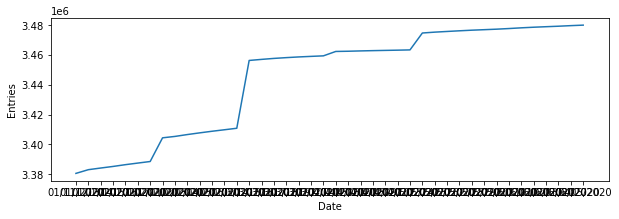

In [12]:
plt.figure(figsize=(10,3))

#plt.plot(df1.iloc[::10].DATE, df1['ENTRIES'])
plt.plot(df1.DATE, df1['ENTRIES'])
plt.xlabel('Date')
plt.ylabel('Entries')

plt.show()

Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)
plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other

In [13]:
df1.DATE[df1.shape[0]-1]

type(df1)

pandas.core.frame.DataFrame

In [14]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1['dayofweek']=df1['DATE'].dt.dayofweek
df1

ENTRIES       DATE  dayofweek
STATION       DATE                                     
RIT-ROOSEVELT 01/11/2020  3380644 2020-01-11          5
              01/12/2020  3383121 2020-01-12          6
              01/13/2020  3384234 2020-01-13          0
              01/14/2020  3385294 2020-01-14          1
              01/15/2020  3386485 2020-01-15          2
              01/16/2020  3387551 2020-01-16          3
              01/17/2020  3388601 2020-01-17          4
              02/01/2020  3404469 2020-02-01          5
              02/02/2020  3405405 2020-02-02          6
              02/03/2020  3406652 2020-02-03          0
              02/04/2020  3407788 2020-02-04          1
              02/05/2020  3408869 2020-02-05          2
              02/06/2020  3409864 2020-02-06          3
              02/07/2020  3410875 2020-02-07          4
              03/14/2020  3456297 2020-03-14          5
              03/15/2020  3457012 2020-03-15          6
              03/16/2020  3457665 2020-03-16          0
              03/17/2020  3458188 2020-03-17          1
              03/18/2020  3458652 2020-03-18          2
              03/19/2020  3459026 2020-03-19          3
              03/20/2020  3459379 2020-03-20          4
              04/04/2020  3462326 2020-04-04          5
              04/05/2020  3462468 2020-04-05          6
              04/06/2020  3462689 2020-04-06          0
              04/07/2020  3462874 2020-04-07          1
              04/08/2020  3463037 2020-04-08          2
              04/09/2020  3463187 2020-04-09          3
              04/10/2020  3463370 2020-04-10          4
              05/23/2020  3474687 2020-05-23          5
              05/24/2020  3475264 2020-05-24          6
              05/25/2020  3475721 2020-05-25          0
              05/26/2020  3476163 2020-05-26          1
              05/27/2020  3476573 2020-05-27          2
              05/28/2020  3476911 2020-05-28          3
              05/29/2020  3477255 2020-05-29          4
              05/30/2020  3477677 2020-05-30          5
              05/31/2020  3478154 2020-05-31          6
              06/01/2020  3478561 2020-06-01          0
              06/02/2020  3478905 2020-06-02          1
              06/03/2020  3479233 2020-06-03          2
              06/04/2020  3479621 2020-06-04          3
              06/05/2020  3479959 2020-06-05          4

In [15]:
s = df.loc[df['STATION'] == 'RIT-ROOSEVELT'].groupby(['STATION', 'DATE'])['ENTRIES'].max() - df.loc[df['STATION'] == 'RIT-ROOSEVELT'].groupby(['STATION', 'DATE'])['ENTRIES'].min()


df3 = df1.groupby(['dayofweek'])['ENTRIES'].sum()
df3

dayofweek
0    20665522
1    20669212
2    20672849
3    20676160
4    20679439
5    20656100
6    20661424
Name: ENTRIES, dtype: int64

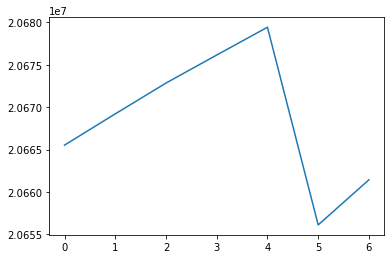

In [16]:
plt.plot(df3)